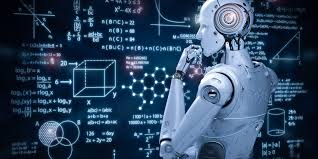

# 1. Funções de Custo - Regressão
Vamos gerar dois conjuntos de dados com 1000 instâncias:
- O conjunto de dados X, com números aleatórios entre 0 e 1 e multiplicados por 10
- O conjunto de dados y, que é uma reta da forma y = 2x - 3, com ruídos gaussianos seguindo uma distribuição normal

In [ ]:
# Importando as bibliotecas numpy, matplotlib e seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo estilo dos gráficos
sns.set_style("darkgrid")

In [ ]:
# Criando os dados X
X = np.random.rand(1000, 1)*10

In [ ]:
# Importando a função add_dummy_feature, do módulo preprocessing
from sklearn.preprocessing import add_dummy_feature

# Adicionando uma coluna de 1's
X_dummy = add_dummy_feature(X)

In [ ]:
# Criando os dados y
y = 2*X - 3 + np.random.randn(1000, 1)

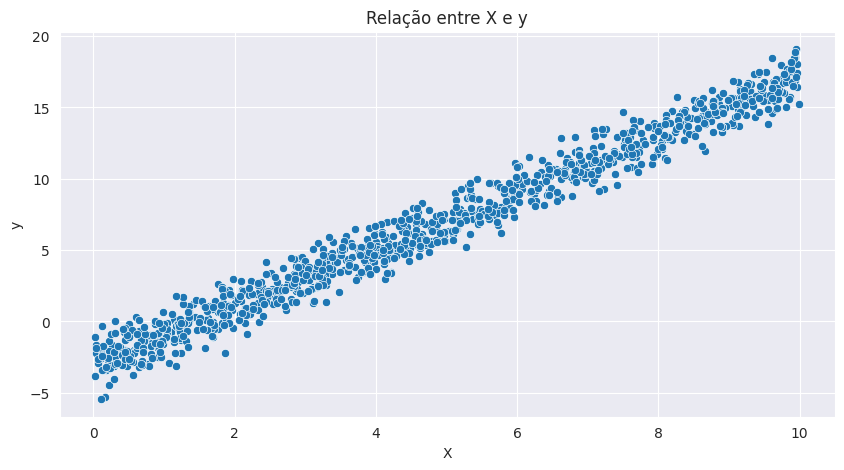

In [ ]:
# Plotando o gráfico de dispersão para mostrar a relação dos dados
plt.figure(figsize = (10, 5))
sns.scatterplot(x = X.reshape(1, -1)[0], y = y.reshape(1, -1)[0])
plt.xlabel("X")
plt.ylabel("y")
plt.title("Relação entre X e y")
plt.show()

In [ ]:
# Encontrando os melhores parâmetros para a reta utilizando a pseudoinversa
teta = np.linalg.pinv(X_dummy).dot(y)

In [ ]:
# Criando os dados de 0 a 10, com 100 números igualmente espaçados
X_plot = np.linspace(start = 0, stop = 10, num = 100).reshape(-1, 1)

In [ ]:
# Adicionando a dummy feature
X_plot_dummy = add_dummy_feature(X_plot)

In [ ]:
# Criando o y_plot
y_plot = teta.T.dot(X_plot_dummy.T)[0]

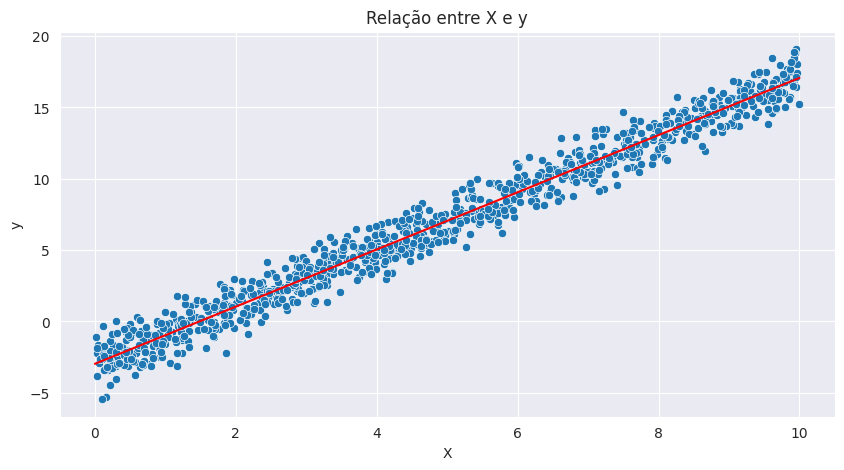

In [ ]:
# Plotando os dados com a reta
plt.figure(figsize = (10, 5))
sns.scatterplot(x = X.reshape(1, -1)[0], y = y.reshape(1, -1)[0])
sns.lineplot(x = X_plot.reshape(1, -1)[0], y = y_plot, color = 'red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Relação entre X e y")
plt.show()

## 1.2 Calculando o custo
Agora, iremos calcular o custo da nossa função utilizando o MSE. Definiremos a função MSE e calcularemos o custo.

In [ ]:
# Definindo a função
def MSE(y_real, y_pred):
    return np.sum((y_pred - y_real)**2)/len(y_pred)

In [ ]:
# Calculando y_pred
y_pred = teta.T.dot(X_dummy.T)
y_pred = y_pred.reshape(-1, 1)

In [ ]:
# Calculando o erro
MSE(y, y_pred)

0.9401076301207001

In [ ]:
# Importando a função de custo mse do módulo metrics
from sklearn.metrics import mean_squared_error

# Calculando o MSE
mean_squared_error(y, y_pred)

0.9401076301207001

# 2. Funções de Custo - Classificação
Para gerar esses dados, utilizaremos a função make_classification, da scikit-learn.

In [ ]:
?make_classification

In [ ]:
# Importando a função make_classification do módulo datasets
from sklearn.datasets import make_classification

# Criando 1000 dados com 5 features, 3 features informativas, 1 feature redundante e 3 classes
X, y = make_classification(n_samples = 1000, n_features = 5, n_informative = 3, n_redundant = 1, n_classes = 3)

In [ ]:
# Importando a função train_test_splot, do módulo model_selection
from sklearn.model_selection import train_test_split

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
# Importando a classe LogisticRegression do módulo linear_model
from sklearn.linear_model import LogisticRegression

# Instanciando e treinando o modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predizendo os valores
y_pred = modelo.predict_proba(X_test)

In [ ]:
# Alterando y_test para um vetor de probabilidades
y_test_proba = np.array([[1, 0, 0] if x == 0 else [0, 1, 0] if x == 1 else [0, 0, 1] for x in y_test])

In [ ]:
# Definindo a função de custo CE (Cross-Entropy)
def CE(y_real, y_pred):
    y_aux = y_real.dot(np.log(y_pred).T)
    soma = 0
    for linha in range(len(y_aux)):
        soma += y_aux[linha][linha]
    return -soma/len(y_pred)

In [ ]:
# Calculando o custo
CE(y_test_proba, y_pred)

0.739818529214508

In [ ]:
# Importando a função log_loss
from sklearn.metrics import log_loss

# Calculando o erro
log_loss(y_test, y_pred)

0.7398185292145079

# 3. Gradiente Descendente
## 3.1. Gradiente Descendente em Batch
Para começar, vamos gerar dois conjuntos de dados, assim como fizemos na função de custo de regressão:
- O conjunto de dados X, com números aleatórios entre 0 e 1 e multiplicados por 10
- O conjunto de dados y, que é uma reta da forma y = 2x - 3, com ruídos gaussianos seguindo uma distribuição normal

In [ ]:
# Criando os dados X e y
X = np.random.rand(1000, 1)*10
y = 2*X - 3 + np.random.randn(1000, 1)

<img src="https://i.ibb.co/55frwy9/vetor-gradiente.png">

In [ ]:
# Definindo uma função que irá retornar os melhores parâmetros
def GDBatch(X, y, learning_rate = 0.01, n_epochs = 1000, random_state = 0):
    # Atribuindo à variável m o número de instâncias
    m = len(X)

    # Fazendo uma inicialização aleatória dos parâmetros
    np.random.seed(random_state)
    teta = np.random.rand(2, 1)

    # Adicionando a variável dummy em X
    from sklearn.preprocessing import add_dummy_feature
    X_dummy = add_dummy_feature(X)

    # Fazendo as iterações, calculando o vetor gradiente e atualizando o vetor teta
    for epoca in range(n_epochs):
        gradiente = X_dummy.T.dot((teta.T.dot(X_dummy.T) - y.reshape(1, -1)).T)*2/m
        teta = teta - learning_rate*gradiente

    # Retornando teta
    return teta

In [ ]:
# Calculando os parâmetros
teta = GDBatch(X, y, learning_rate = 0.01, n_epochs = 5000, random_state = 0)

In [ ]:
# Visualizando os parâmetros
teta

array([[-2.96569529],
       [ 1.99041093]])

In [ ]:
# Adicionando a dummy feature
X_dummy = add_dummy_feature(X)

In [ ]:
# Calculando oa parâmetros com a pseudoinversa
teta_real = np.linalg.pinv(X_dummy).dot(y)

In [ ]:
# Visualizando os parâmetros com a pseudoinversa
teta_real

array([[-2.96569529],
       [ 1.99041093]])

## 3.2. Gradiente Descendente Estocástico

In [ ]:
xi = X_dummy[500, :]
yi = y[500]

In [ ]:
# Definindo uma função que irá retornar os parâmetros
def GDEstocastico(X, y, learning_rate = 0.01, n_epochs = 1000):
    # Atribuindo à variável m o número de instâncias
    m = len(X)

    # Definindo de forma aleatória os parâmetros
    teta = np.random.rand(2, 1)

    # Lista para armazenar os valores do learning_rate
    learning_rates = list()

    # Adicionando a variável dummy
    from sklearn.preprocessing import add_dummy_feature
    X_dummy = add_dummy_feature(X)

    # Iterando o número de épocas
    for epoca in range(n_epochs):
        # Iterando o número de instâcias
        for iteracao in range(m):
            # Pegando um índice aleatório
            indice = np.random.randint(m)

            # Pegando a instância que corresponde ao índice
            xi = X_dummy[indice, :]
            yi = y[indice]

            # Cálculo do gradiente
            gradiente = xi.reshape(1, -1).T.dot((teta.T.dot(xi.T) - yi).reshape(1, -1))*2

            # Learning Schedule
            learning_schedule = m*learning_rate/(m*epoca + iteracao + m)
            learning_rates.append(learning_schedule)

            # Atualizando os parâmetros
            teta = teta - learning_schedule*gradiente

    # Retornarndo teta e os learning rates
    return teta, learning_rates

In [ ]:
# Calculando os parâmetros
teta, learning_rates = GDEstocastico(X, y, learning_rate = 0.01, n_epochs = 1000)

In [ ]:
# Visualizando os parâmetros
teta

array([[-2.9681191 ],
       [ 1.98978779]])

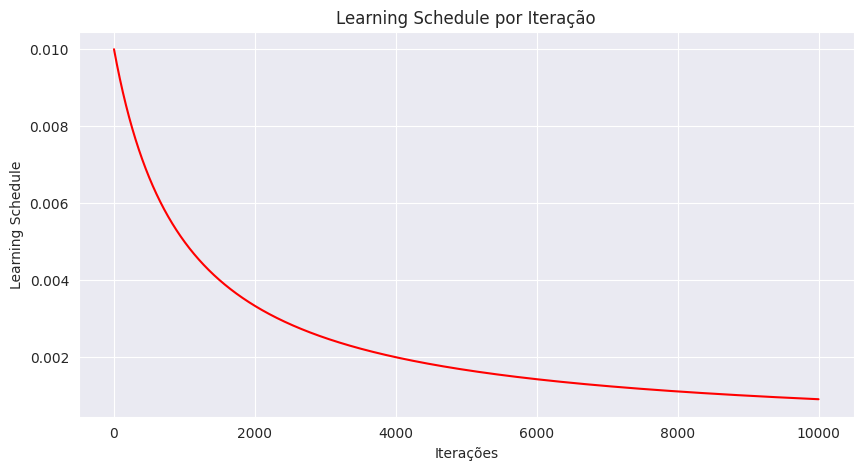

In [ ]:
# Plotando o learning rate ao longo das iterações
plt.figure(figsize = (10, 5))
sns.lineplot(x = list(range(1, 10001, 1)), y = learning_rates[:10000], color = 'red')
plt.xlabel("Iterações")
plt.ylabel("Learning Schedule")
plt.title("Learning Schedule por Iteração")
plt.show()

## 3.3. Gradiente Descendente em Mini-Batch

In [ ]:
# Definindo uma função que irá retornar os parâmetros
def GDMiniBatch(X, y, learning_rate = 0.01, n_epochs = 1000, batch_size = 50):
    # Atribuindo à variável m o número de instâncias
    m = len(X)

    # Definindo de forma aleatória os parâmetros
    teta = np.random.rand(2, 1)

    # Adicionando a variável dummy
    from sklearn.preprocessing import add_dummy_feature
    X_dummy = add_dummy_feature(X)

    # Iterando o número de épocas
    for epoca in range(n_epochs):
        # Iterando o número de instâcias
        for iteracao in range(m):
            # Pegando um índice aleatório
            indice = np.random.randint(m - batch_size)

            # Pegando as instâncias que correspondem à fatia
            xi = X_dummy[indice:indice+batch_size, :]
            yi = y[indice:indice+batch_size]

            # Cálculo do gradiente
            gradiente = xi.T.dot((teta.T.dot(xi.T) - yi.reshape(1, -1)).T)*2/batch_size

            # Learning Schedule
            learning_schedule = m*learning_rate/(m*epoca + iteracao + m)

            # Atualizando os parâmetros
            teta = teta - learning_schedule*gradiente

    # Retornando teta
    return teta

In [ ]:
# Calculando os parâmetros
teta = GDMiniBatch(X, y, learning_rate = 0.01, n_epochs = 1000, batch_size = 20)

In [ ]:
# Visualizando os parametros - 50 batch_size
teta

array([[-2.96792754],
       [ 1.99195346]])